In [1]:
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")

/home/skolak/animAIte/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Fetching 16 files: 100%|██████████| 16/16 [00:00<00:00, 23546.97it/s]


In [5]:
pipe = pipe.to("cuda:1")
prompt = "myself as a girl lifting the corner of the sea"
#images = pipe(prompt, num_inference_steps=3, width=896, height=504) #might be the best to use
images = pipe(prompt, num_inference_steps=10, width=1024, height=576) #possibly the limit

100%|██████████| 10/10 [00:12<00:00,  1.29s/it]


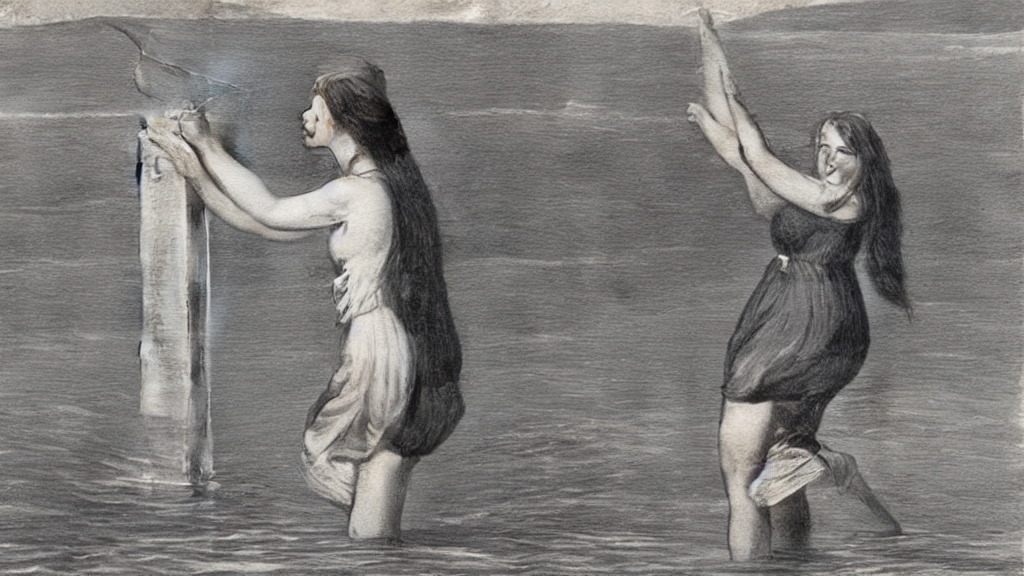

In [6]:
import os 
import random 

base_path = "../images"
if not os.path.exists(base_path):
    os.makedirs(base_path)

prompt_path = prompt.replace(' ', '_')
full_path = os.path.join(base_path, prompt_path)
if os.path.exists(full_path):
    #find a random number to append to the end of the path
    random_num = random.randint(0, 100000)
    full_path = full_path + str(random_num)
    os.makedirs(full_path)
else:
    os.makedirs(full_path)

for i, img in enumerate(images):
    img[0].save(os.path.join(full_path, f"image_{i}.png"))

#print the last image
images[-1][0]

In [8]:
#create a video from the images 
import cv2
import os

image_folder = '../images/myself_as_a_girl_lifting_the_corner_of_the_sea37094'
video_name = 'video.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 1, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

In [10]:
make_video(images, size=(1024, 576))

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'write'
> Overload resolution failed:
>  - image is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'image'
